# Problem Statement

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

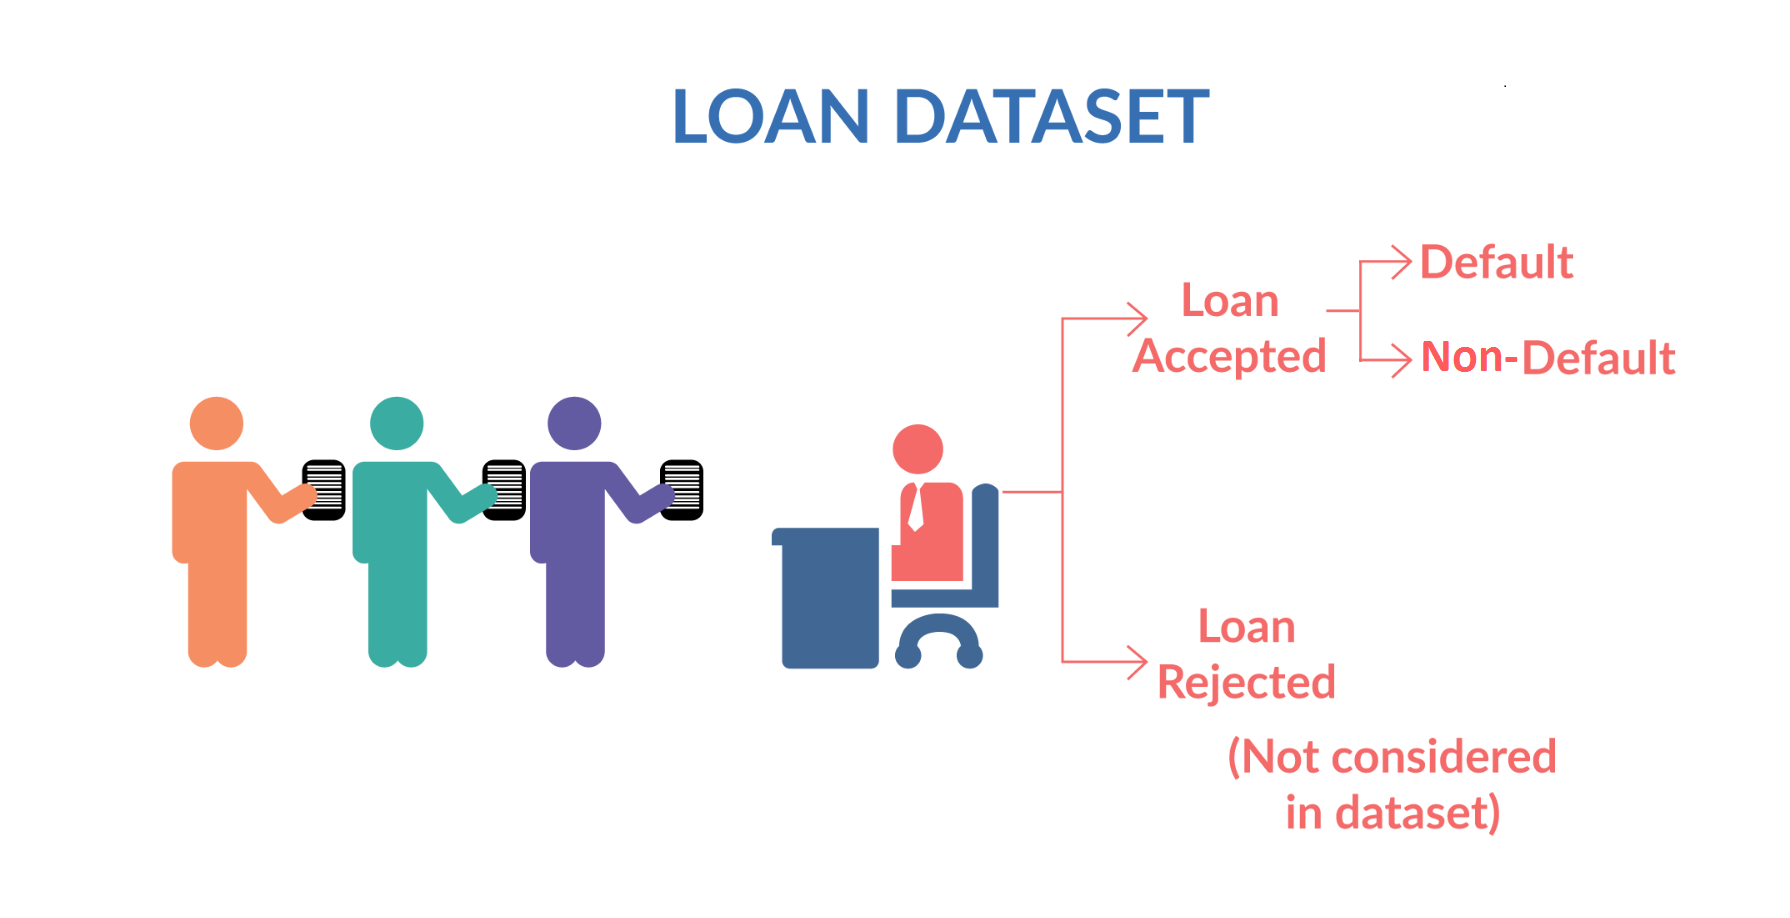
Figure Loan Data Set can also refer to link: [Upgrad Lending Club Case Study](https://learn.upgrad.com/course/4617/segment/27462/164543/505323/2600603)

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

    * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Note: Evaluation Rubric For reference
1. Data understanding  (10%)
2. Data Cleaning and Manipulation (20%)
3. Data analysis (40%)
4. Presentation and Recommendations (20%)
5. Conciseness and readability of the code (10%)

## Thought Process 

1. Exporing Data 
    For understanding or to explore data set, first step is to load the data and and analyse using 
      * df.info
      * df.shape
      * df[listofcols].describe().T T : to transpose the data for easy visualization

2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data. 
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.
    
3. Data analysis includes:
    - Check for mean, median, mode , and std deviations, which gives us insights into the data and distribution of data.
    - Check for outliers : can be checked using visualization boxplot, the boxplot clearly shows the outliers , whiskers of the box plot indicate the outliers.
    - Based on above analysis, we can have outlier threshold of interquartile ranges q1 as 0.05 and q4 as 0.95 (5% percentile to 95% percentile) and remove the outliers.
    - Outliers can impact analysis as the analysis will be hearvily biased towards outliers, so the outliers needs to be identfied and replaced with threshold values (need to rephrase these)
    
    **NOTE** : check EDA session by Aditya B : on replacing data using threadsholds  time frame for the same in the video : 1:56:13 
    link : [EDA session by Aditya B](https://live.upgrad.com/summary/oa1QB1mFMoFniNGUDjsreNfCZ3NTAse7)
    
    - Correlation function : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features.
    
    **TODO** : add more details on data analysis and cleaning and path we want to take for case study.
    
  

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



df = pd.read_csv("loan.csv", low_memory=False)
df.columns = df.columns.str.replace(' ', '')

data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict.columns = data_dict.columns.str.replace(' ', '')

In [33]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [34]:
data_dict = data_dict[:-2]

In [35]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [36]:
#Few columns have extra spaces as the end in the data dictionary
#lets trim these spaces
data_dict.LoanStatNew = data_dict.LoanStatNew.apply(lambda x : x.strip())


In [37]:
#Rename the verification_status_joint to verified_status_joint as its not matching column in df and in data_dict
df.rename(columns = {'verification_status_joint':'verified_status_joint'},inplace = True)

In [38]:
#Lets go through each column and understand the dtype and number of null values
for col in df.columns:
    print("Column Name          : ",col)
    print("Data Type            : ",df[col].dtype)
    print("Number of NnN Values : ",df[col].isnull().mean()*100,"%")
    print("Description          : ",data_dict[data_dict.LoanStatNew == col].iloc[0,1])

    print("-----------------------------------------------")

Column Name          :  id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned ID for the loan listing.
-----------------------------------------------
Column Name          :  member_id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned Id for the borrower member.
-----------------------------------------------
Column Name          :  loan_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
-----------------------------------------------
Column Name          :  funded_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The total amount committed to that loan at that point in time.
-----------------------------------------------
Column Nam

Number of NnN Values :  97.12969257496789 %
Description          :  Next scheduled payment date
-----------------------------------------------
Column Name          :  last_credit_pull_d
Data Type            :  object
Number of NnN Values :  0.0050356270614598285 %
Description          :  The most recent month LC pulled credit for this loan
-----------------------------------------------
Column Name          :  collections_12_mths_ex_med
Data Type            :  float64
Number of NnN Values :  0.1409975577208752 %
Description          :  Number of collections in 12 months excluding medical collections
-----------------------------------------------
Column Name          :  mths_since_last_major_derog
Data Type            :  float64
Number of NnN Values :  100.0 %
Description          :  Months since most recent 90-day or worse rating
-----------------------------------------------
Column Name          :  policy_code
Data Type            :  int64
Number of NnN Values :  0.0 %
Description 

Description          :  Number of satisfactory bankcard accounts
-----------------------------------------------
Column Name          :  num_bc_tl
Data Type            :  float64
Number of NnN Values :  100.0 %
Description          :  Number of bankcard accounts
-----------------------------------------------
Column Name          :  num_il_tl
Data Type            :  float64
Number of NnN Values :  100.0 %
Description          :  Number of installment accounts
-----------------------------------------------
Column Name          :  num_op_rev_tl
Data Type            :  float64
Number of NnN Values :  100.0 %
Description          :  Number of open revolving accounts
-----------------------------------------------
Column Name          :  num_rev_accts
Data Type            :  float64
Number of NnN Values :  100.0 %
Description          :  Number of revolving accounts
-----------------------------------------------
Column Name          :  num_rev_tl_bal_gt_0
Data Type            :  float64
N

In [39]:
df.shape

(39717, 111)

In [40]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [42]:
# Parsing through all columns with a aim to find all totally NULL/NaN columns
columns = data_dict.LoanStatNew

#Last two entries of data_dict are NaN, so removing it 
columns = columns.dropna()

# Creating an empty array for null columns
null_columns = []

#Parsing all the columns
for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

#Checking the count of null columns found
print(len(null_columns))

# Printing the null columns
print(null_columns)

54
['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verified_status_j

In [43]:
df.shape

(39717, 111)

In [44]:
# Droping all the newly found null/nan columns in single command
df = df.drop(null_columns, axis=1)

In [45]:
df.shape

(39717, 57)

In [46]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [47]:
# Dropping the columns where all entries are exactly same
df = df.drop(same_value_cols, axis=1)


In [48]:
df.shape

(39717, 48)

In [49]:
# Drop columns if the % of missing values in col is greater than or equal to 90%
for col in df.columns:
    if df[col].isnull().mean()*100 >= 90:
        print("Droping ",col)
        df.drop(col,axis=1,inplace=True)

Droping  mths_since_last_record
Droping  next_pymnt_d


In [50]:
# Dropping colummns named as desc
df.drop("desc",axis=1,inplace=True)


In [51]:
df.shape

(39717, 45)

In [52]:
# Dropping colummns named as mths_since_last_delinq
df.drop("mths_since_last_delinq",axis=1,inplace=True)


In [53]:
# Sort and print top 10 NULL values column names
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])




emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
term                       0
int_rate                   0
installment                0
dtype: int64


In [72]:
# Date Column that can be candidate for derived matrix
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
# 15  issue_d                  39717 non-null  object 
# 24  earliest_cr_line         39717 non-null  object 
#  40  last_pymnt_d             39646 non-null  object 
#  42  last_credit_pull_d       39715 non-null  object 

# df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
# df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))

# df_dict.loc[len(df_dict.index)] = ['issue_d_month',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]
# df_dict.loc[len(df_dict.index)] = ['issue_d_year',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]

# df.drop('issue_d',axis=1,inplace=True)

In [74]:
# Columns that should be int/float
# Data columns (total 44 columns):
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
#  5   term                     39717 non-null  object 
#  6   int_rate                 39717 non-null  object 
#  11  emp_length               38642 non-null  object 
#  29  revol_util               39667 non-null  object 

df['term'] = df['term'].apply(lambda x:x.replace(" months", "").replace(" ", ""))
df['int_rate'] = df['int_rate'].apply(lambda x:x.replace("%", ""))
df['revol_util'] = df['revol_util'].astype(str).apply(lambda x:x.replace("%", ""))


In [75]:
# Change from object to int/float

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)

In [77]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [78]:
df.shape

(39717, 44)

In [79]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [59]:
df.shape

(39717, 44)

In [80]:
df.columns    

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [81]:
#Listing top 10 columns with null 
print(sorted_columns[:10])


emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
term                       0
int_rate                   0
installment                0
dtype: int64


# Univariant Analysis 

In [82]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [83]:
def remove_outliers_df(df):
    return df

def remove_outliers_series(series):
    return series


In [84]:
def create_boxplot_distplot(col):
    fig, ax = plt.subplots(figsize=(20, 5))
    #Box plot
    sns.boxplot(df[col], ax=ax)
    plt.title("Boxplot for "+col)
    plt.show()

    #Distribution plot
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(df[col], ax=ax)
    plt.title("Density Histogram for "+col)
    plt.show()
    print(df[col].describe())

In [85]:
def create_countplot(col):
    plt.figure(figsize=(10,5))
    sns.countplot(df[col], order=sorted(df[col].unique()))
    plt.title("Countplot for "+col)
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
#All numeric columns:
#  2   loan_amnt                39717 non-null  int64  
#  3   funded_amnt              39717 non-null  int64  
#  4   funded_amnt_inv          39717 non-null  float64
#  5   term                     39717 non-null  int64  
#  6   int_rate                 39717 non-null  float64
#  7   installment              39717 non-null  float64
#  13  annual_inc               39717 non-null  float64
#  22  dti                      39717 non-null  float64
#  23  delinq_2yrs              39717 non-null  int64  
#  25  inq_last_6mths           39717 non-null  int64  
#  26  open_acc                 39717 non-null  int64  
#  27  pub_rec                  39717 non-null  int64  
#  28  revol_bal                39717 non-null  int64  
#  29  revol_util               39667 non-null  float64
#  30  total_acc                39717 non-null  int64  
#  31  out_prncp                39717 non-null  float64
#  32  out_prncp_inv            39717 non-null  float64
#  33  total_pymnt              39717 non-null  float64
#  34  total_pymnt_inv          39717 non-null  float64
#  35  total_rec_prncp          39717 non-null  float64
#  36  total_rec_int            39717 non-null  float64
#  37  total_rec_late_fee       39717 non-null  float64
#  38  recoveries               39717 non-null  float64
#  39  collection_recovery_fee  39717 non-null  float64
#  41  last_pymnt_amnt          39717 non-null  float64
#  43  pub_rec_bankruptcies     39020 non-null  float64
    

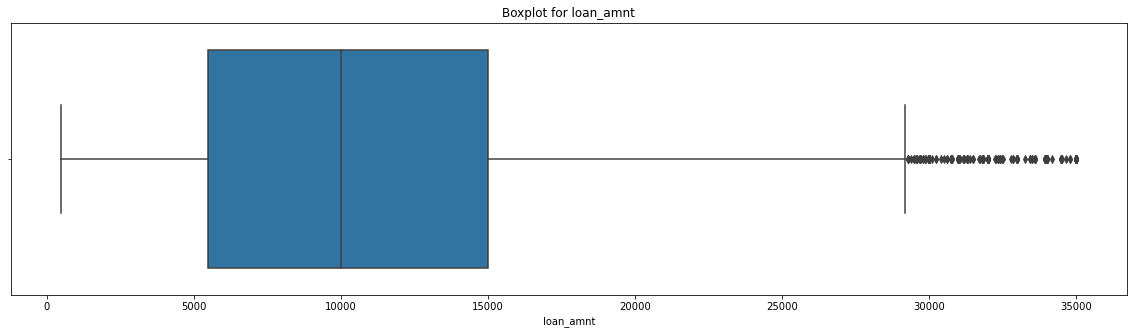

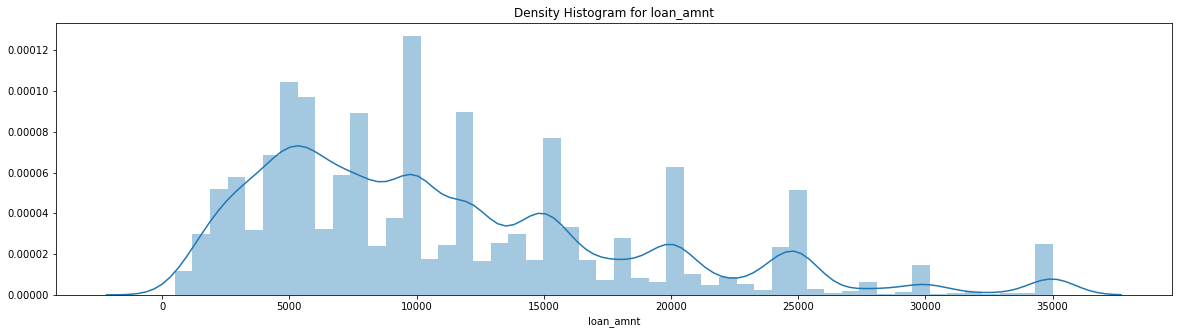

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [144]:
create_boxplot_distplot('loan_amnt')


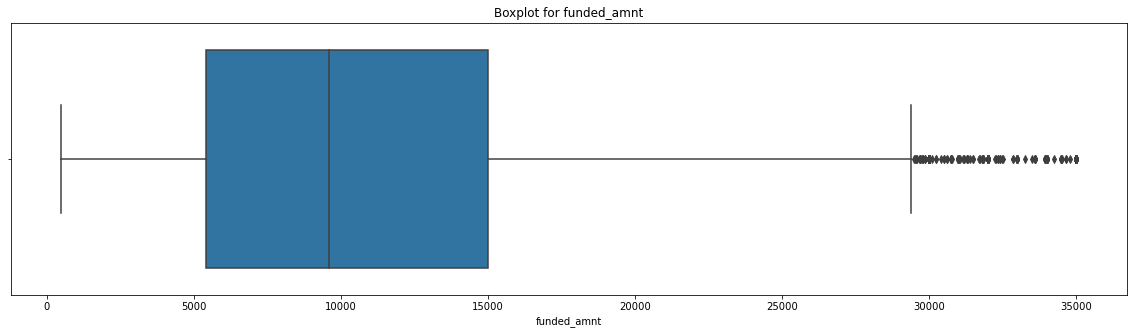

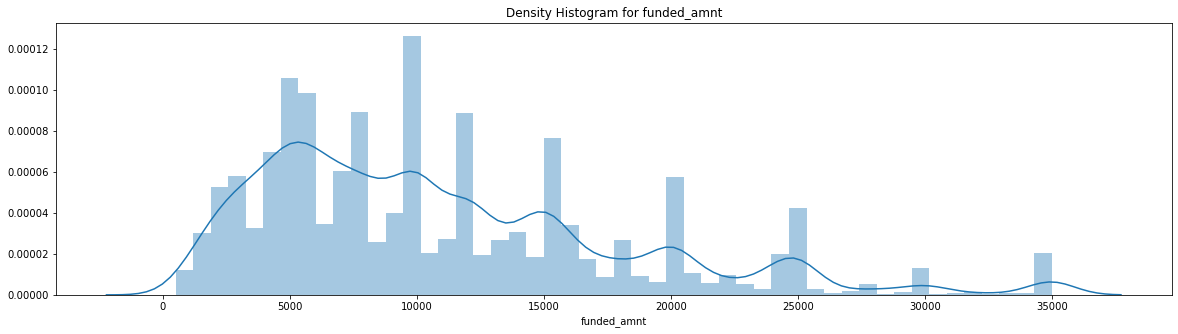

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


In [143]:
create_boxplot_distplot('funded_amnt')


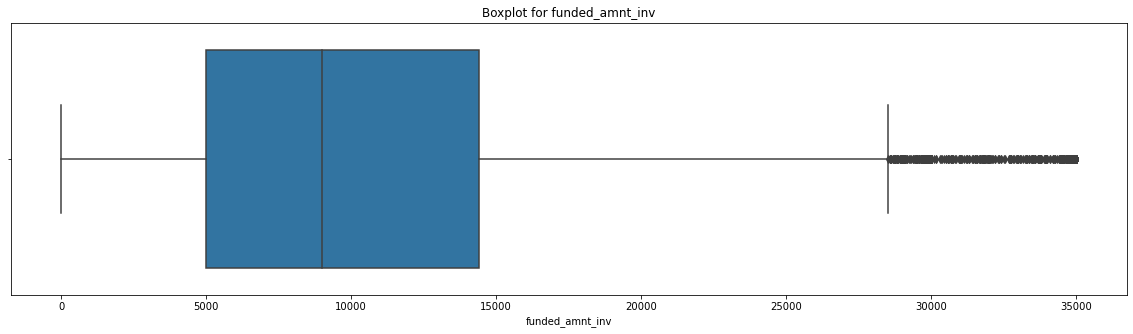

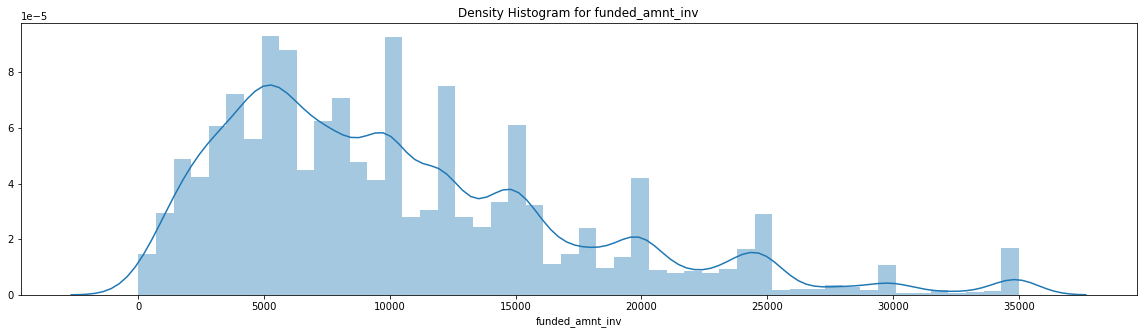

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [89]:
create_boxplot_distplot('funded_amnt_inv')


In [ ]:
create_boxplot_distplot('annual_inc')


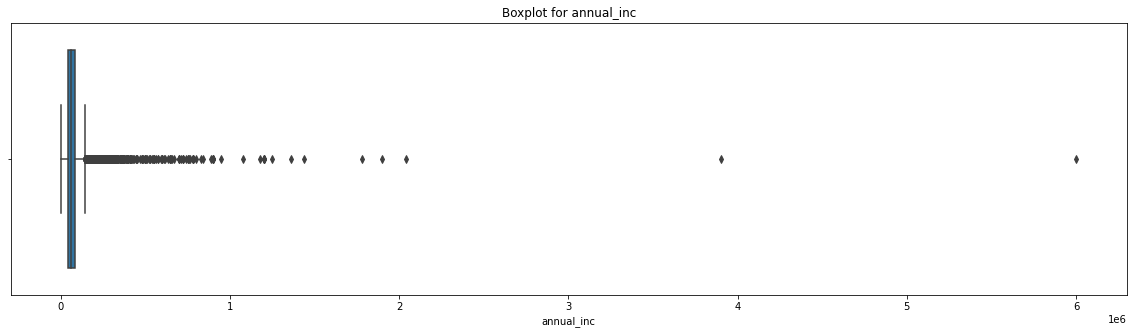

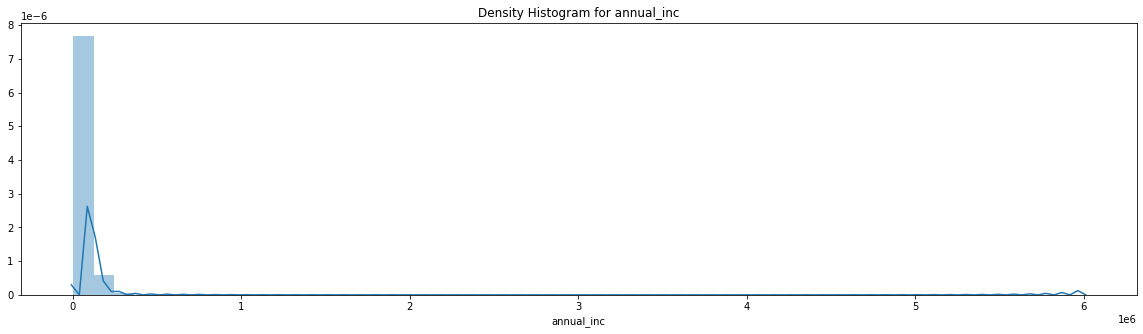

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [68]:
create_boxplot_distplot('annual_inc')

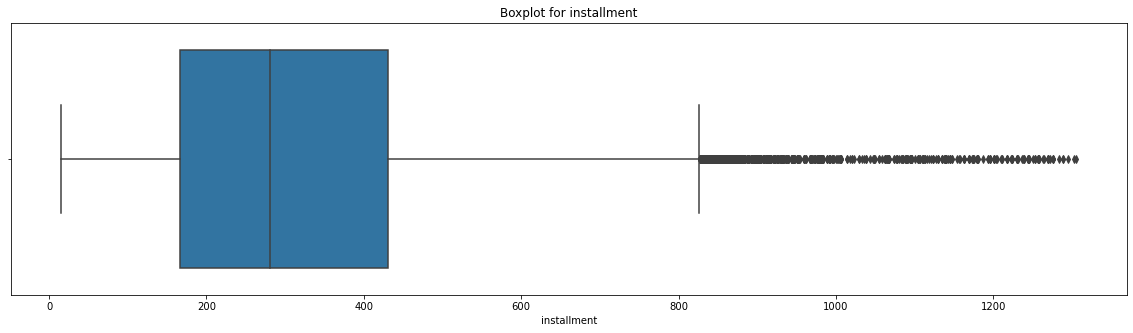

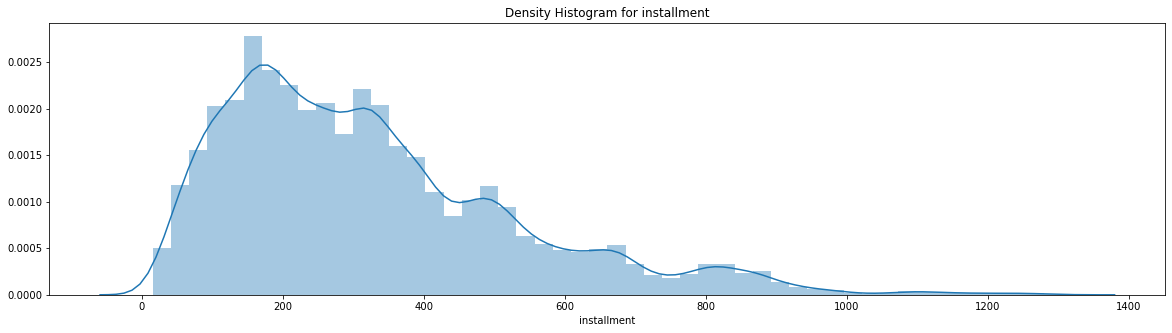

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


In [157]:
create_boxplot_distplot('installment')


In [ ]:
create_boxplot_distplot('int_rate') 


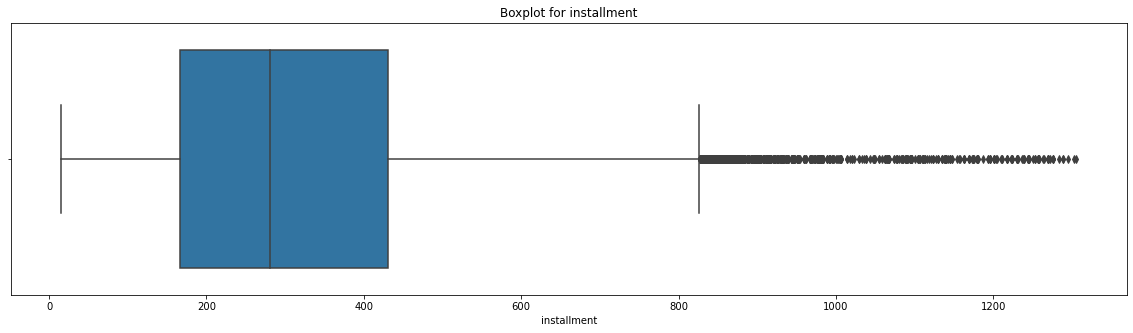

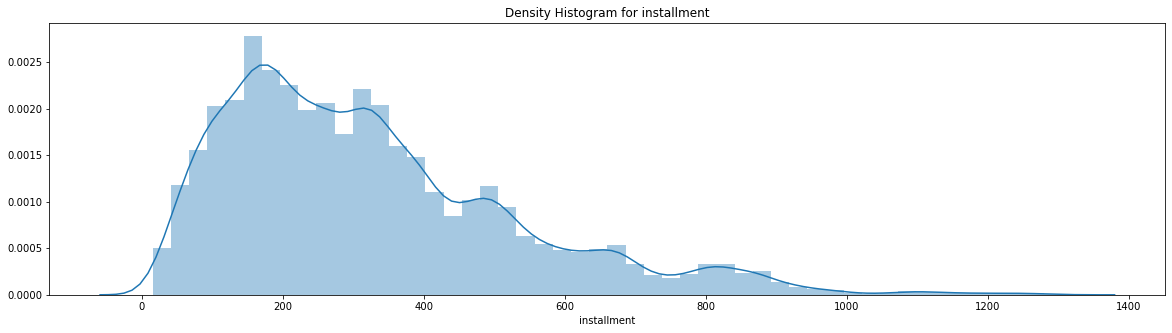

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


In [159]:
create_boxplot_distplot('installment')

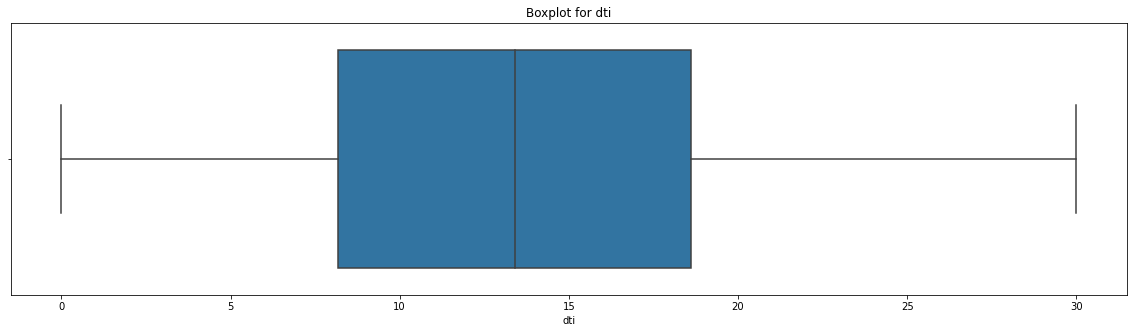

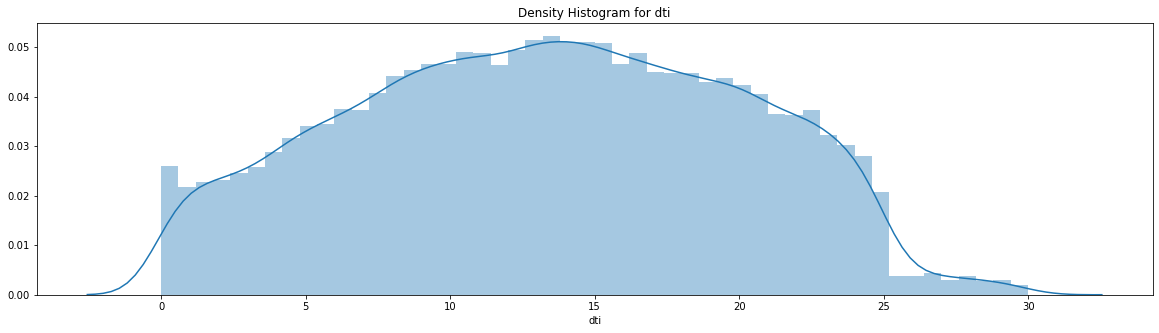

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


In [99]:
create_boxplot_distplot('dti')

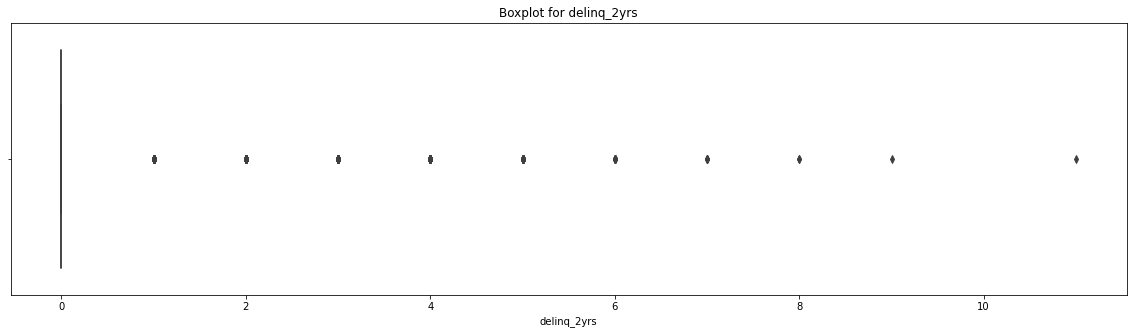

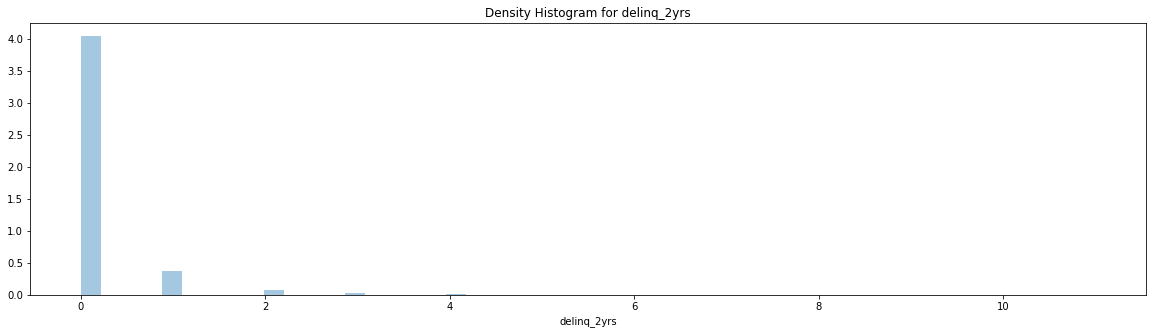

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


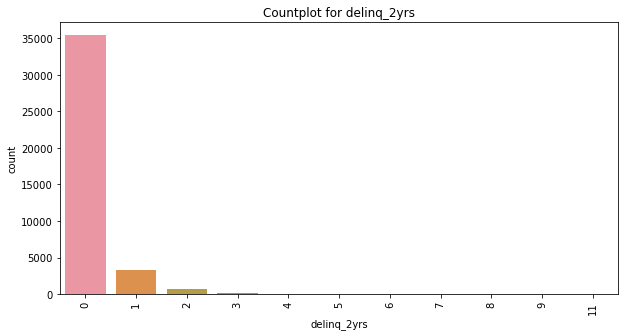

In [140]:
create_boxplot_distplot('delinq_2yrs')
create_countplot('delinq_2yrs')

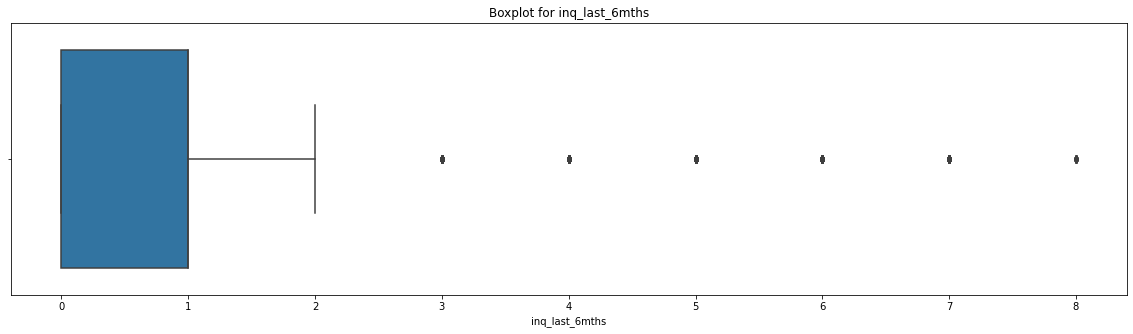

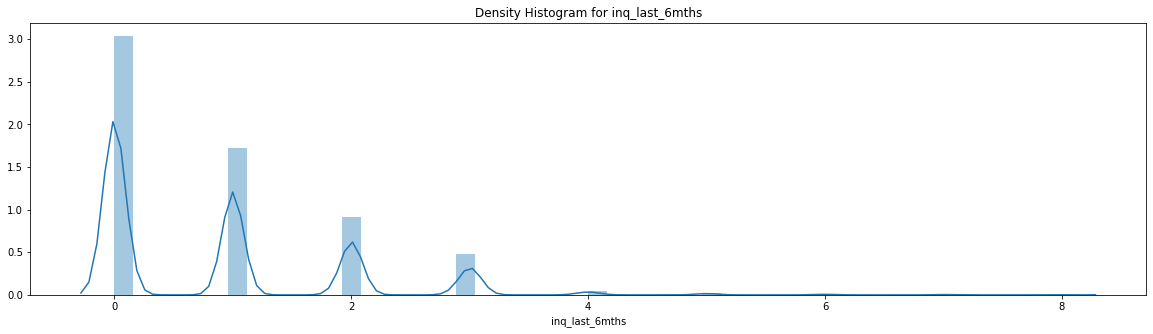

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


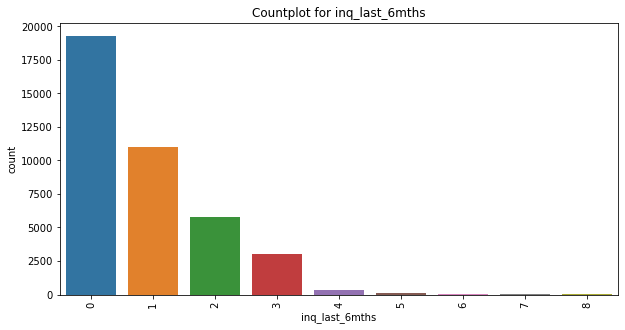

In [150]:

create_boxplot_distplot('inq_last_6mths') 
create_countplot('inq_last_6mths') 

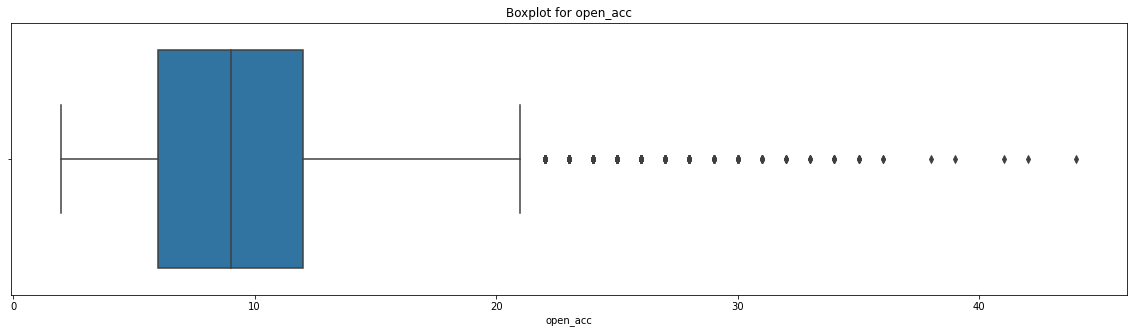

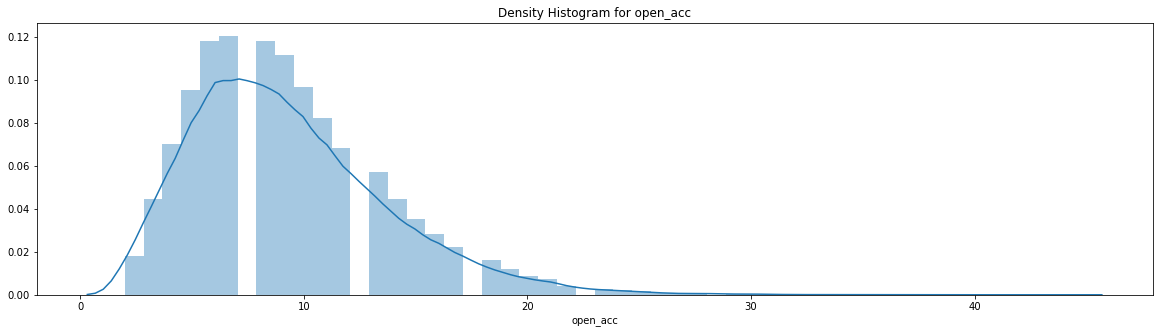

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


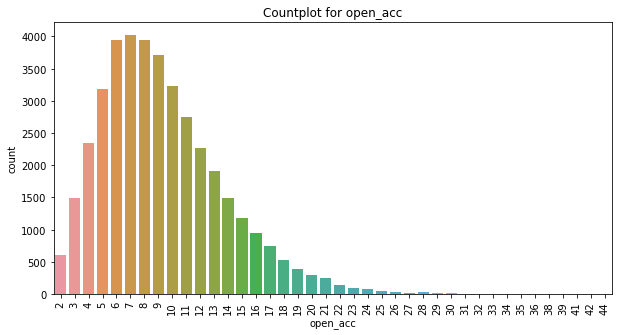

In [151]:
create_boxplot_distplot('open_acc') 
create_countplot('open_acc') 

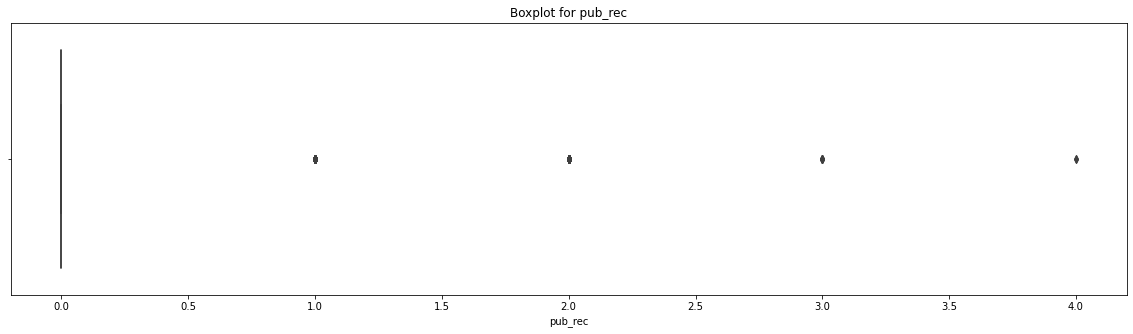

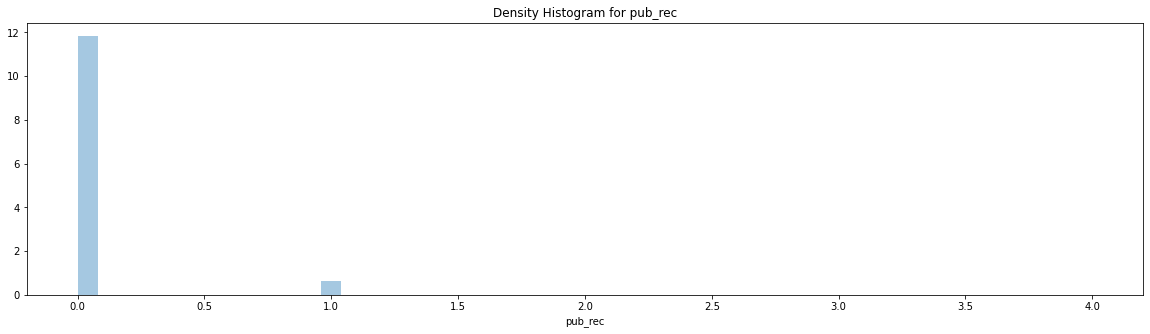

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


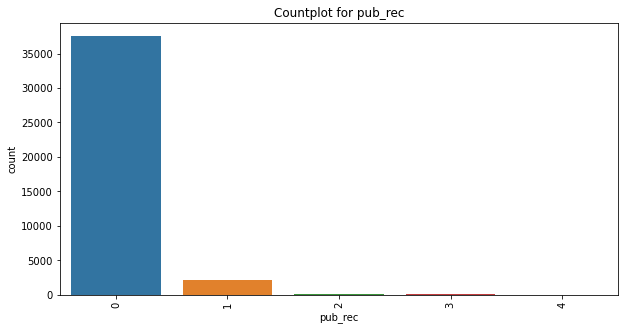

In [152]:
create_boxplot_distplot('pub_rec')
create_countplot('pub_rec')

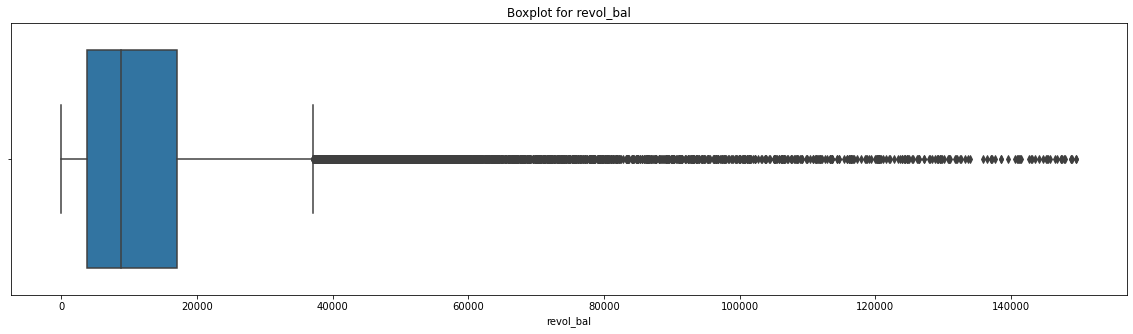

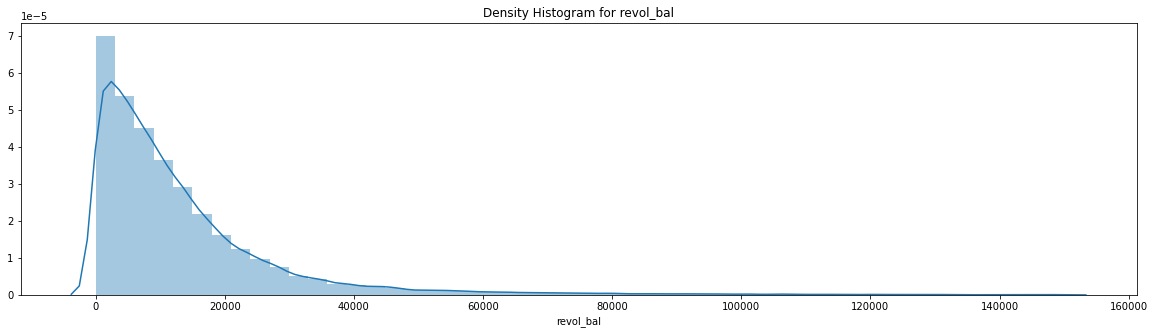

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64


In [163]:
create_boxplot_distplot('revol_bal')

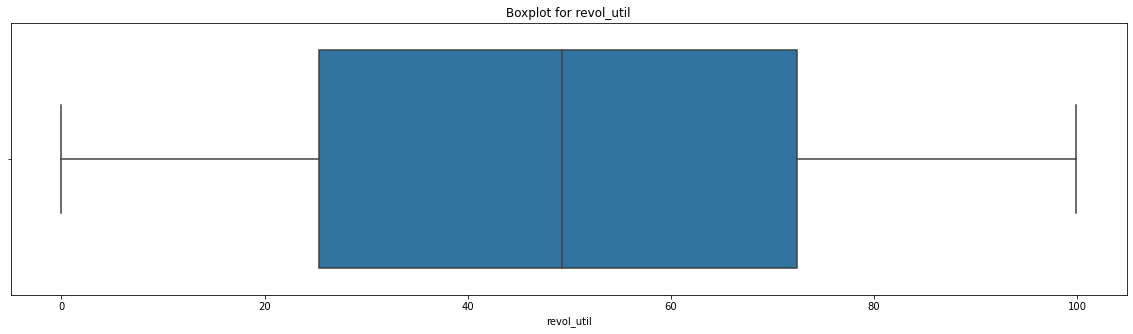

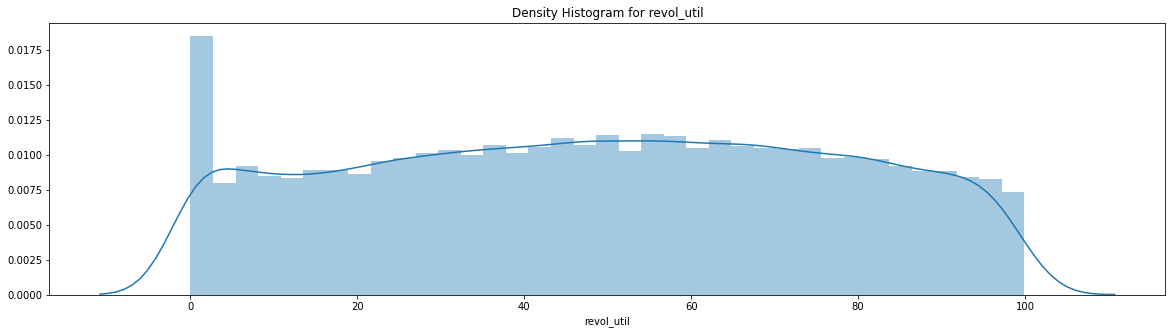

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


In [164]:
# The amount of credit the borrower is using relative to all available revolving credit
create_boxplot_distplot('revol_util')
# create_countplot('revol_util')

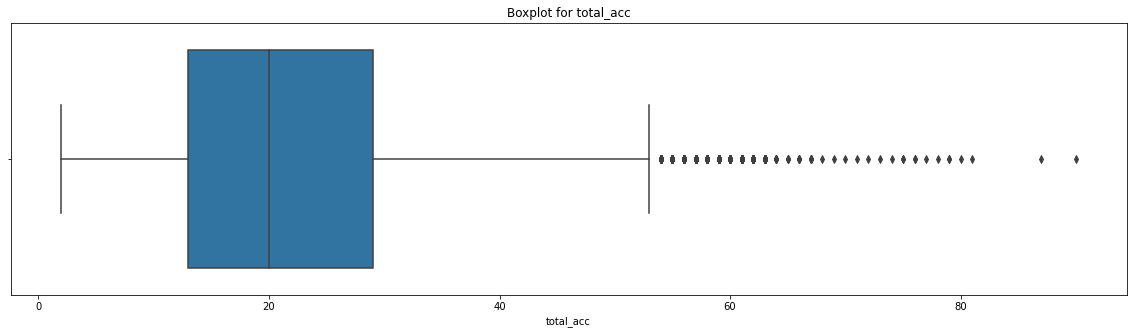

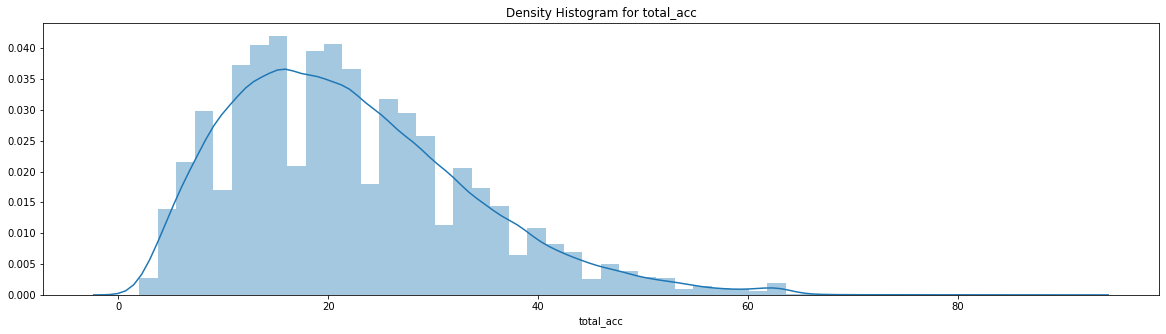

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


In [165]:
create_boxplot_distplot('total_acc')
# create_countplot('total_acc')

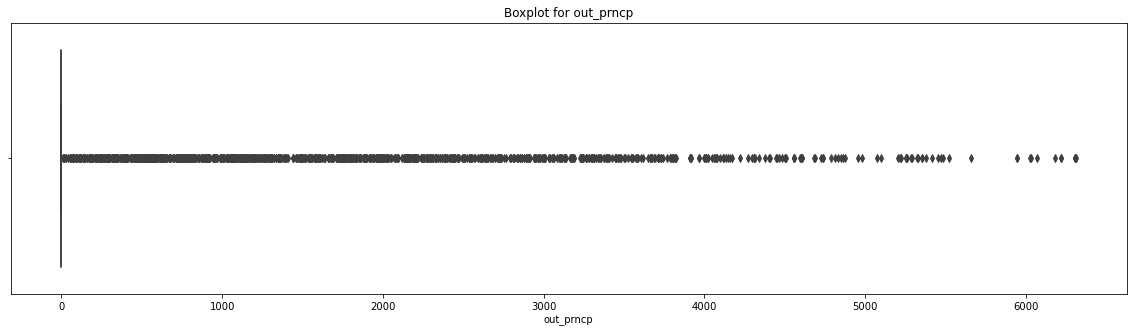

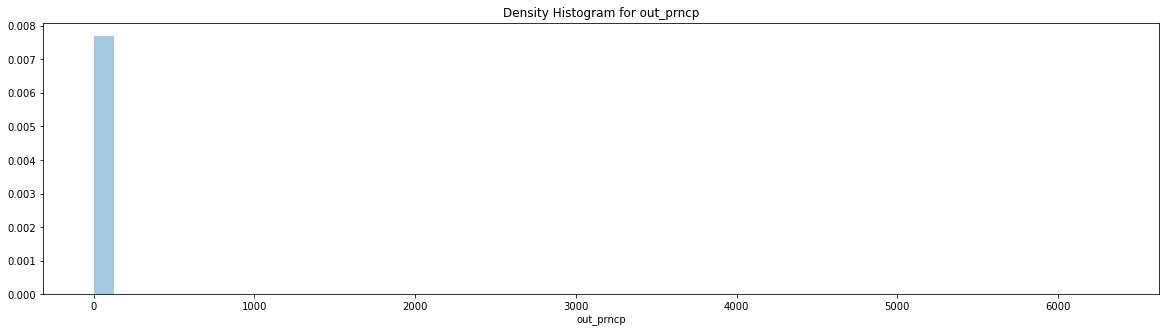

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64


In [107]:
create_boxplot_distplot('out_prncp')

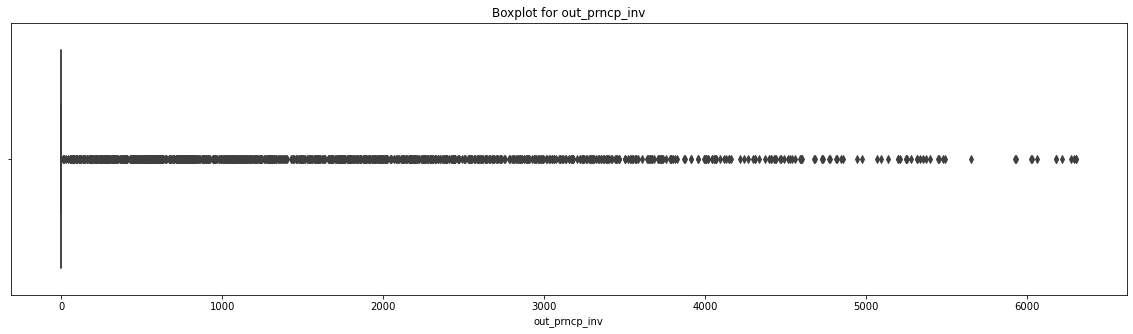

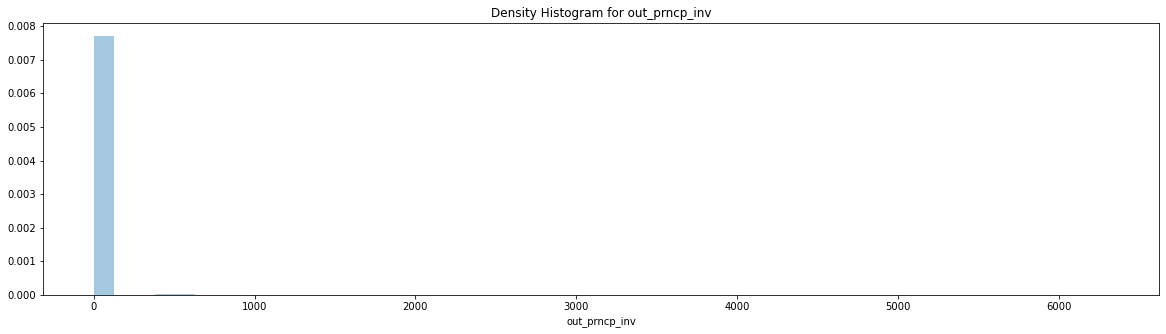

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64


In [108]:

create_boxplot_distplot('out_prncp_inv')

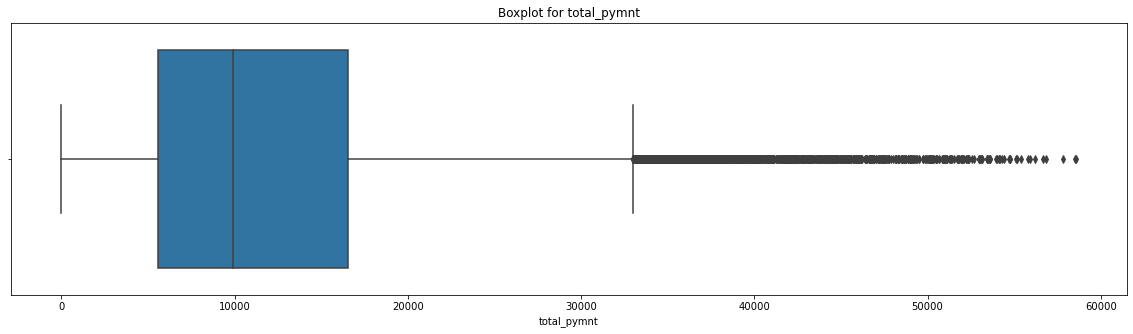

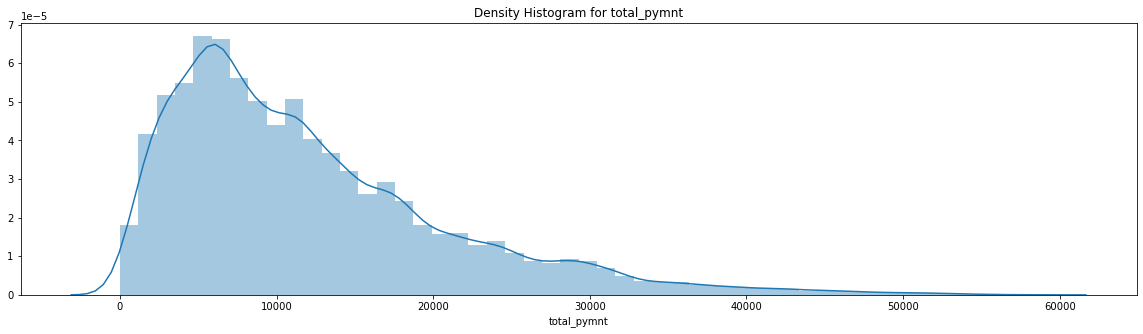

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64


In [109]:
create_boxplot_distplot('total_pymnt')

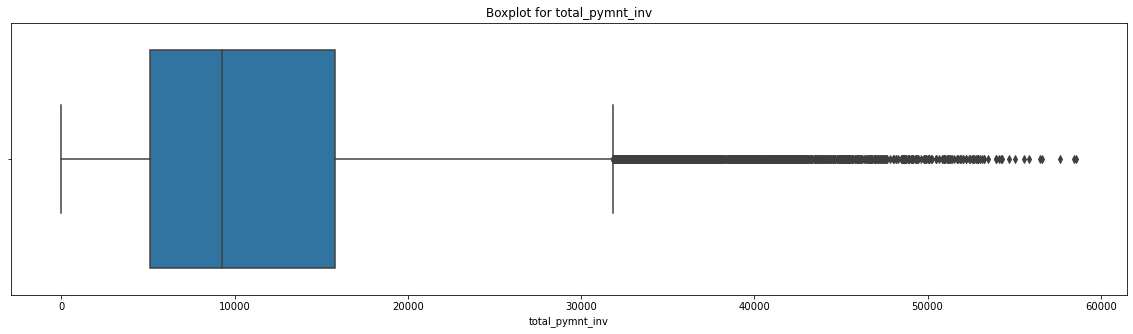

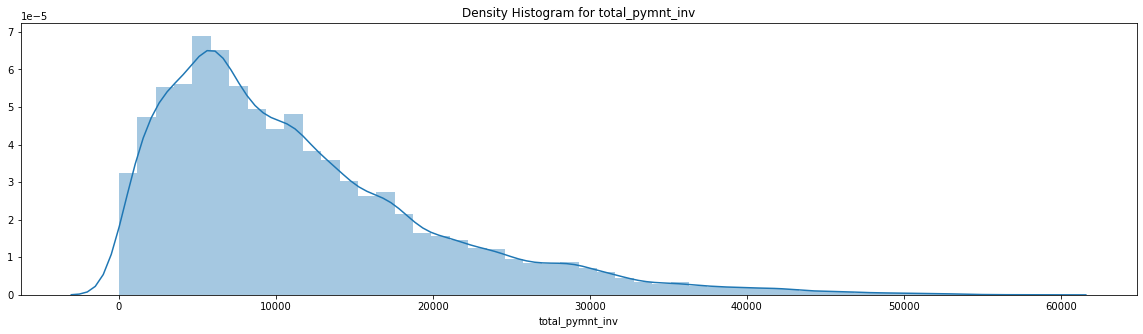

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64


In [110]:
create_boxplot_distplot('total_pymnt_inv')

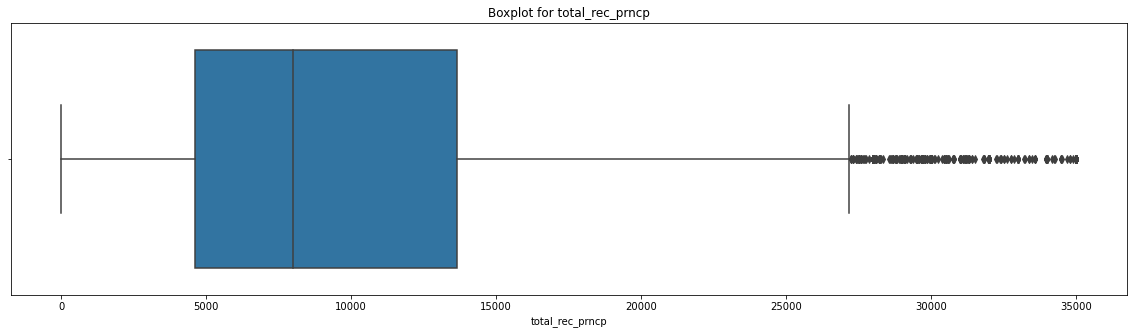

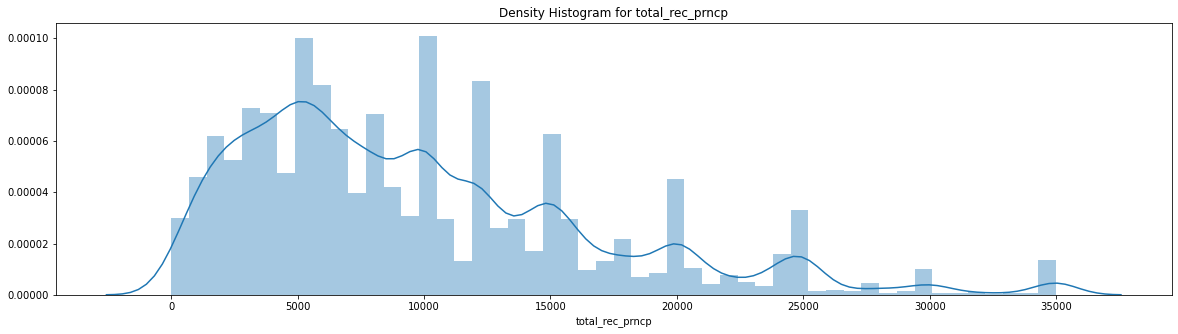

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64


In [111]:
create_boxplot_distplot('total_rec_prncp')

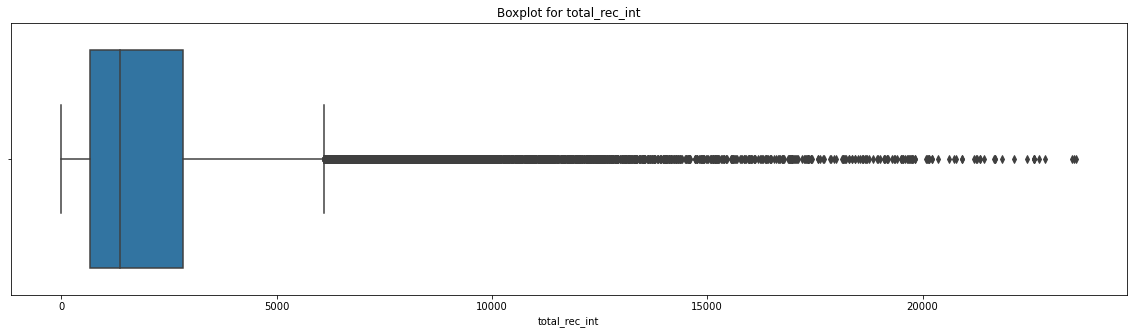

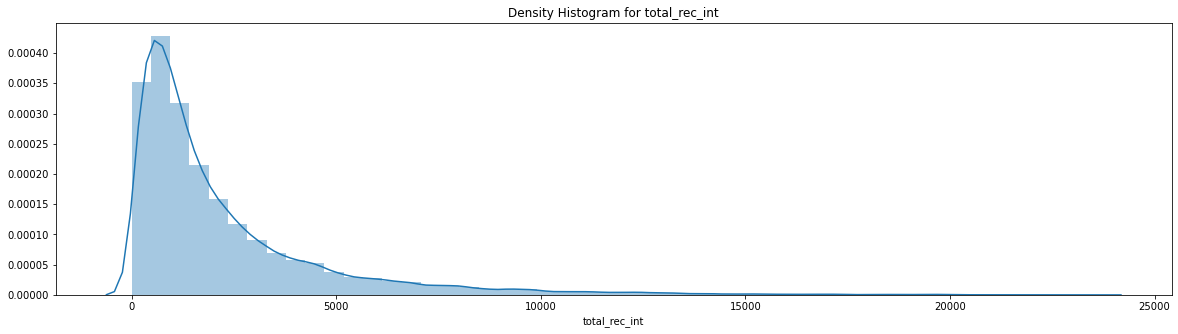

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64


In [112]:
create_boxplot_distplot('total_rec_int')

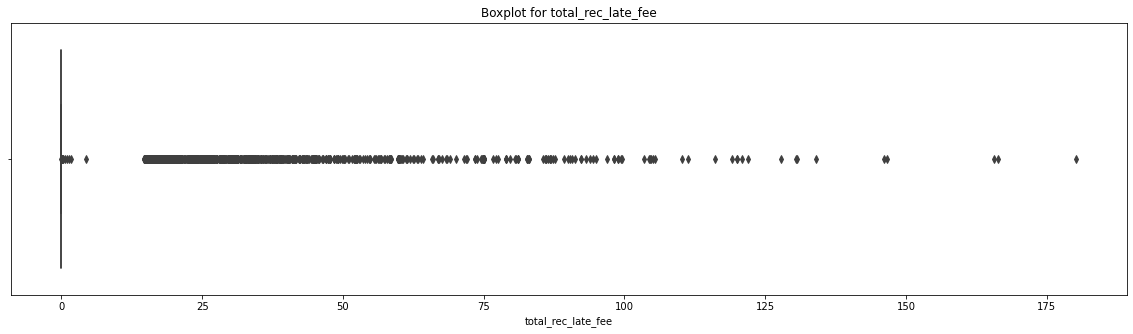

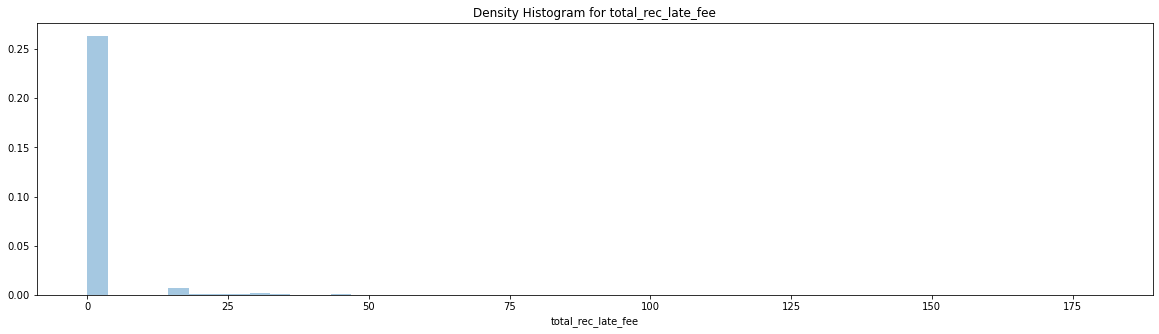

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64


In [113]:
create_boxplot_distplot('total_rec_late_fee')

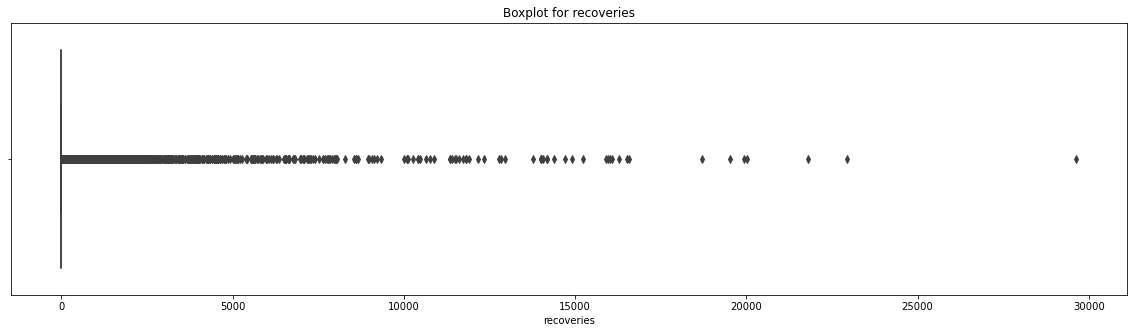

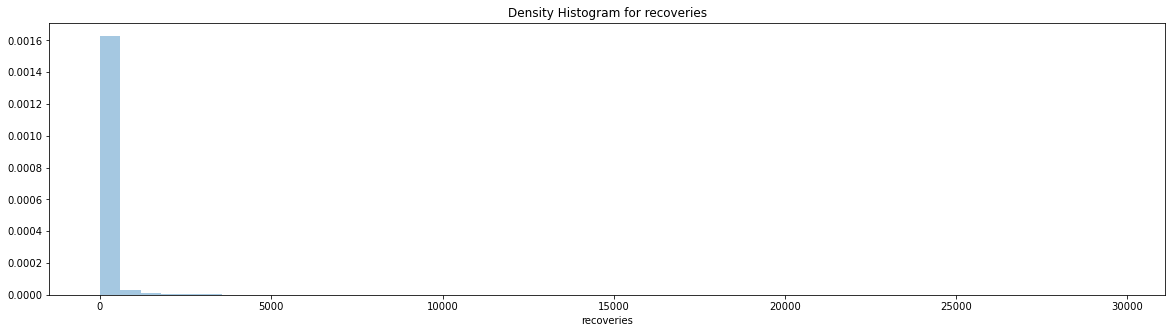

count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64


In [114]:
create_boxplot_distplot('recoveries')

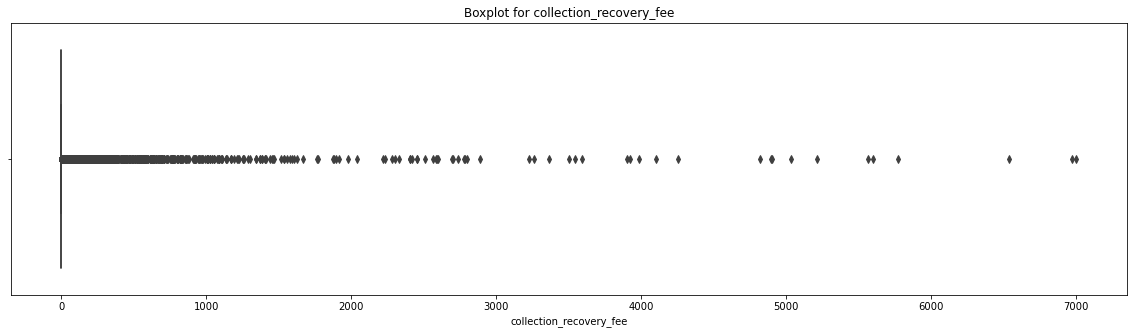

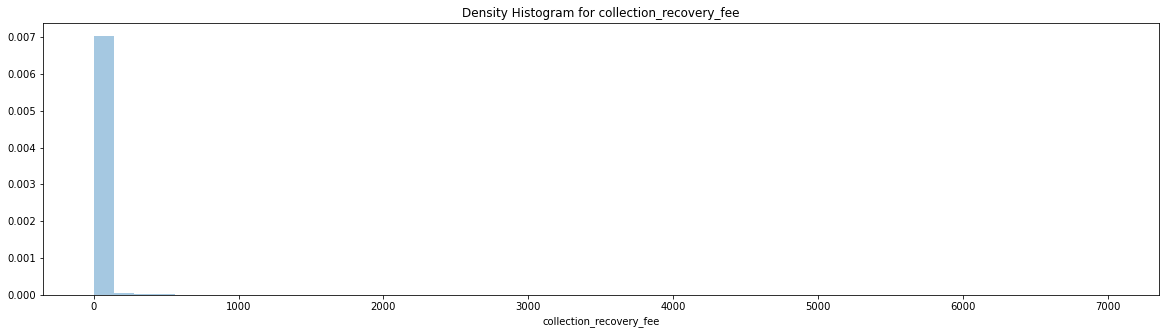

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64


In [115]:
create_boxplot_distplot('collection_recovery_fee')

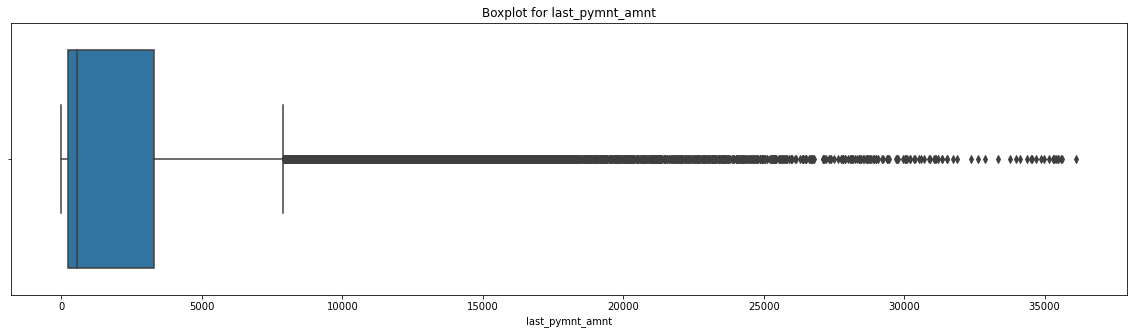

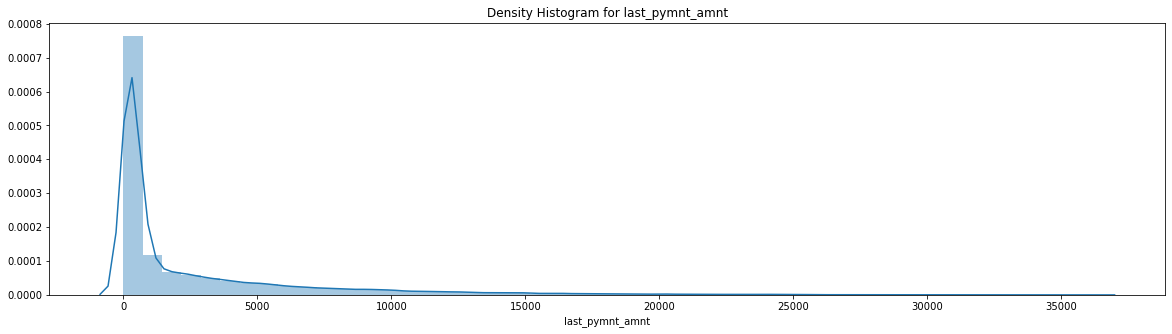

count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64


In [116]:
create_boxplot_distplot('last_pymnt_amnt')

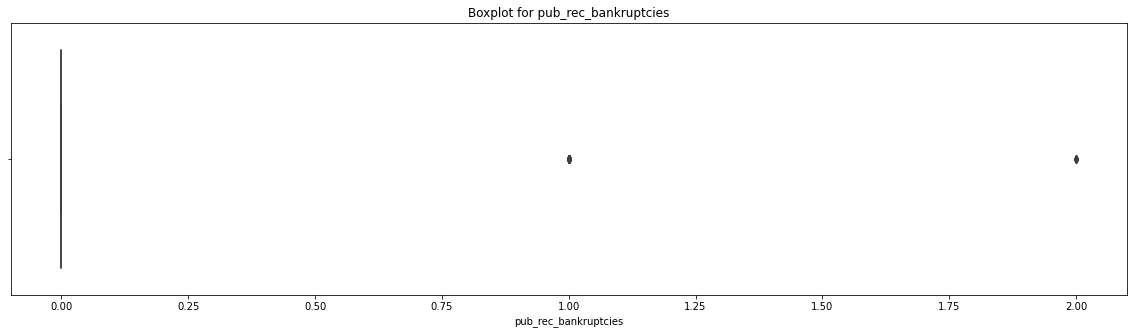

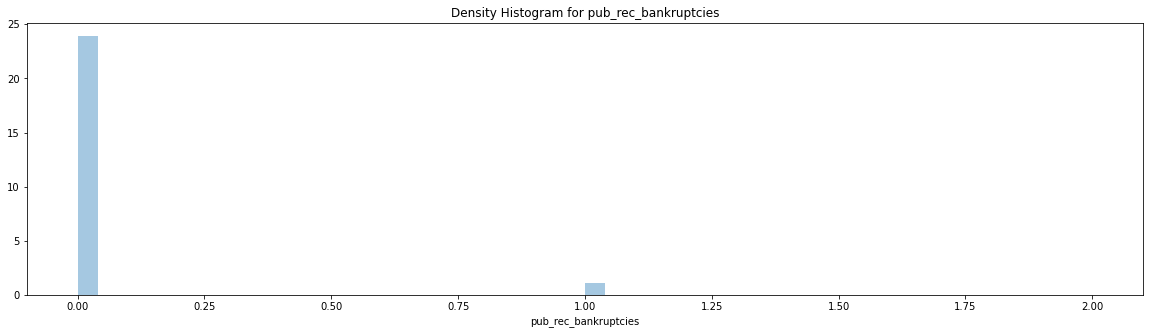

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [117]:
create_boxplot_distplot('pub_rec_bankruptcies')


In [120]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [137]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0.5"))

df['emp_length'] = df['emp_length'].astype(float)

In [138]:
df.emp_length.value_counts()

10.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

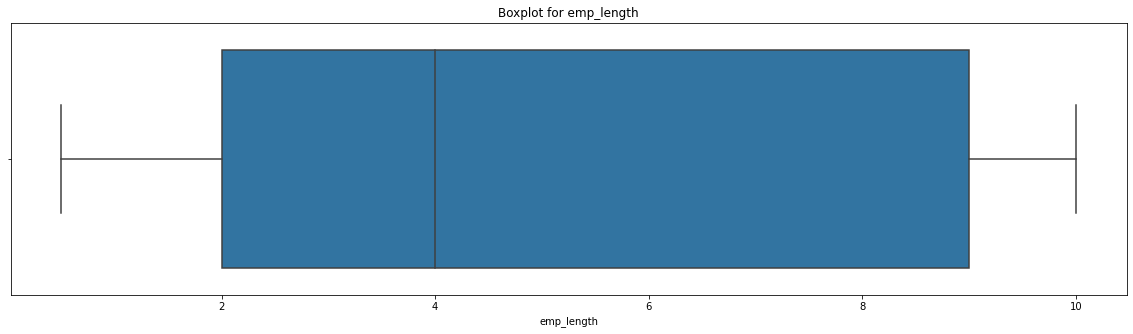

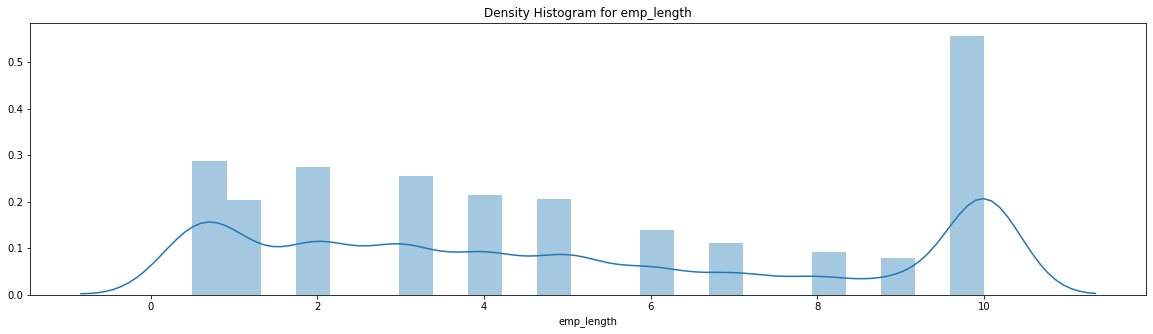

count    38642.000000
mean         5.032749
std          3.482562
min          0.500000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [139]:
create_boxplot_distplot('emp_length')

# Biivariant Analysis 

In [ ]:
# # Columns to be considered with term

# loan_amnt
# emp_length
# grade
# sub grade
# home_ownership
# verification_status
# purpose
# pub_rec_bankruptcies
# issue_d_month
# addr_state
# zip_code



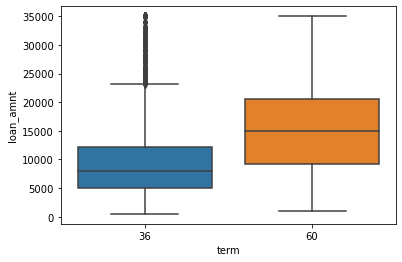

In [167]:
sns.boxplot(x='term', y='loan_amnt', data=df)


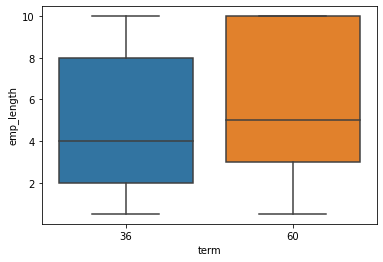

In [168]:
sns.boxplot(x='term', y='emp_length', data=df)

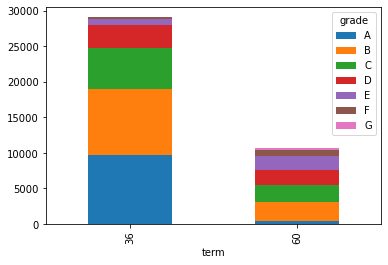

In [184]:
# sns.boxplot(x='term', y='grade',  data=df)

df.groupby(['term', 'grade']).size().unstack().plot(kind='bar', stacked=True)


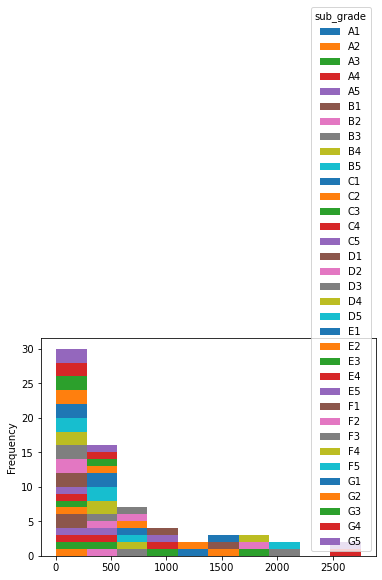

In [190]:


df.groupby(['term', 'sub_grade']).size().unstack().plot(kind='hist', stacked=True)


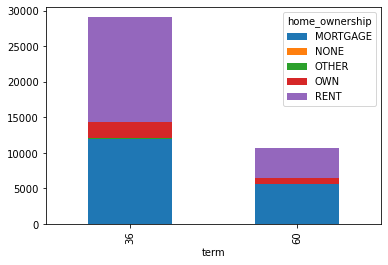

In [196]:
# sns.boxplot(x='term', y='home_ownership', data=df)

df.groupby(['term', 'home_ownership']).size().unstack().plot(kind='bar', stacked=True)


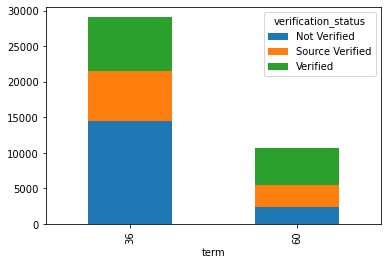

In [197]:

df.groupby(['term', 'verification_status']).size().unstack().plot(kind='bar', stacked=True)


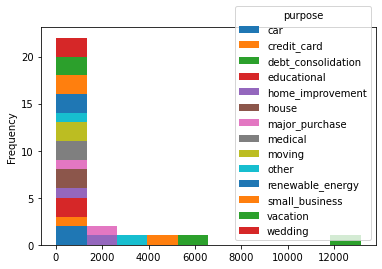

In [203]:
# Zero bankruptcies are max impact

df.groupby(['term', 'purpose']).size().unstack().plot(kind='hist', stacked=True)



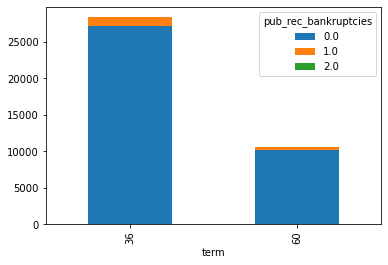

In [201]:
# Zero bankruptcies are max impact

df.groupby(['term', 'pub_rec_bankruptcies']).size().unstack().plot(kind='bar', stacked=True)


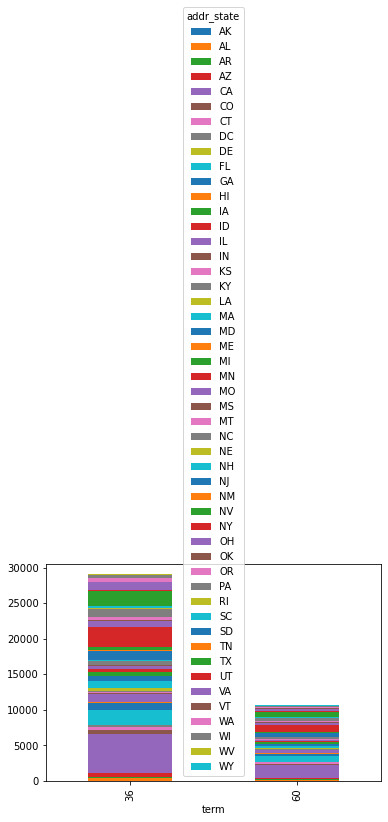

In [214]:
# Zip code has no impcat

df.groupby(['term', 'addr_state']).size().unstack().plot(kind='bar', stacked=True)


